In [1]:
# https://stackoverflow.com/questions/16780014/import-file-from-parent-directory
import sys
sys.path.append("../")
# import ../db.py
from utils import *
from align_utils import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

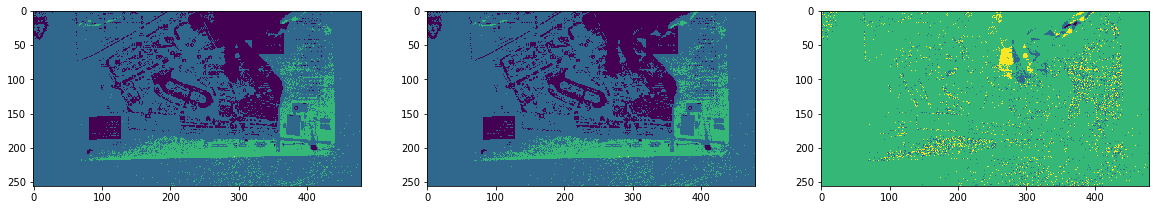

In [3]:
import cv2
ref = (cv2.imread("comp_chan_0.png", 0)-9.0)/3.0
alt = (cv2.imread("comp_chan_0_1.png", 0)  -9.0)/3.0
fig, ax = plt.subplots(1, 3, figsize=(20, 16))
ax[0].imshow(ref)  # frame 0
ax[1].imshow(alt) # frame 1
ax[2].imshow(ref - alt)
plt.show()

total error: 3150.0


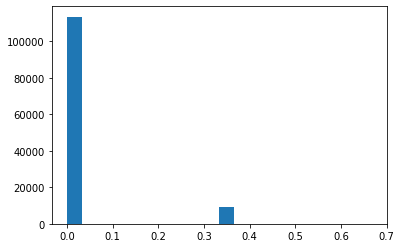

In [13]:
print("total error:", np.sum(np.abs(ref - alt)))
plt.hist(np.abs(ref - alt).flatten(), 20)
plt.show()

In [5]:
print_stat("ref", ref)

ref stat: max: 1.0, min: 0.0, mean: 0.3055040147569444, std: 0.17163940361257743


In [6]:
gpref, gpalt = gauss_pyramid(ref, 2), gauss_pyramid(alt, 2)

In [7]:
final_align_field = align_gauss_pyramid(gpref, gpalt, 16)

align from coarse to fine...
level 1 aligning
level 2 aligning


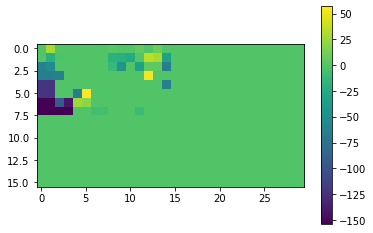

In [9]:
plt.imshow(final_align_field[..., 0])
plt.colorbar()
plt.show()

In [10]:
alignedImg = align_final(alt, final_align_field)

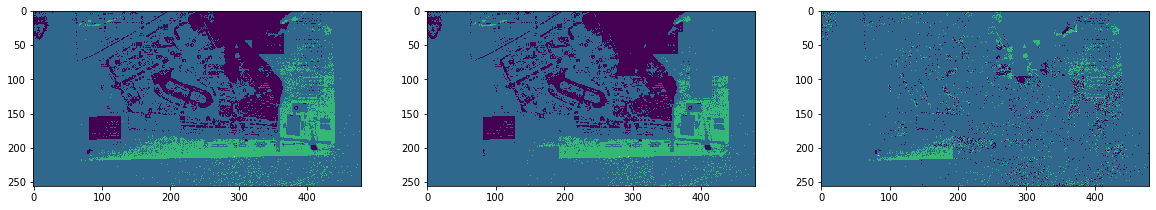

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(20, 16))
ax[0].imshow(ref)
ax[1].imshow(alignedImg) # frame 1
ax[2].imshow(ref - alignedImg)
plt.show()

total error: 2958.6666666666665


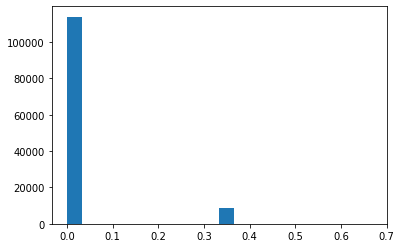

In [12]:
print("total error:", np.sum(np.abs(ref - alignedImg)))
plt.hist(np.abs(ref - alignedImg).flatten(), 20)
plt.show()